In [6]:
import concurrent.futures
from time import perf_counter
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import gridspec, pyplot as plt
from matplotlib.widgets import Slider, CheckButtons
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm

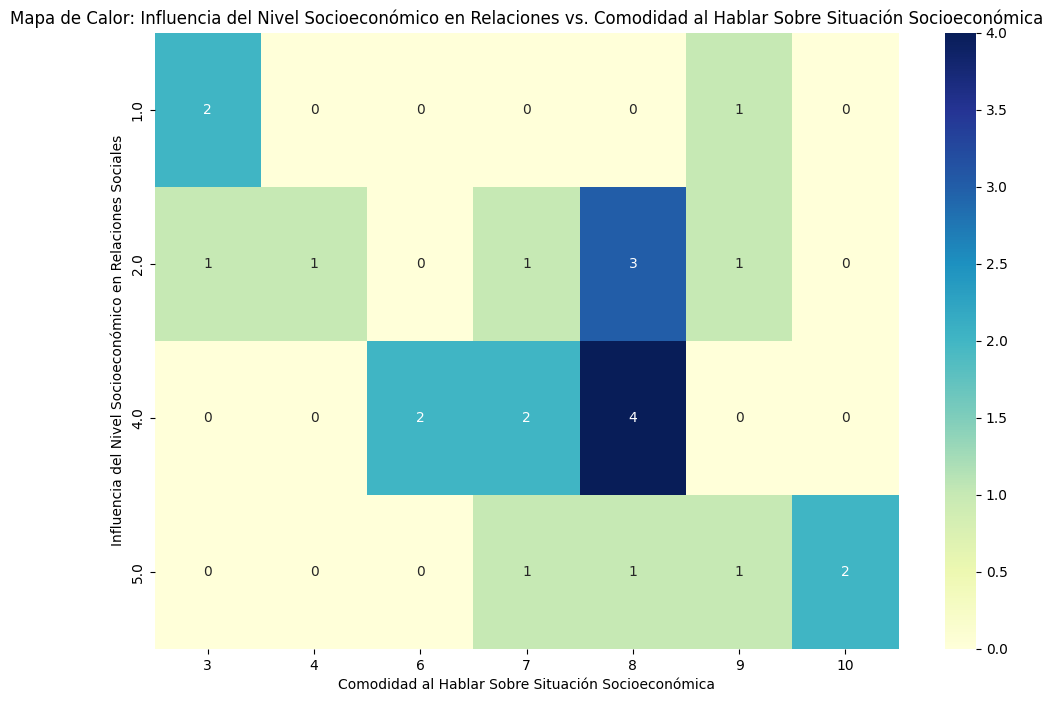

In [11]:

file_path = 'Voces Estudiantiles_ Socioeconomía en el Tec de Monterrey, Santa Fe (Responses) (1).xlsx'
data = pd.read_excel(file_path)

# Mapeo de las respuestas a valores numéricos para el mapa de calor
response_mapping = {
    "Definitivamente no": 5,
    "Probablemente no": 4,
    "Neutral": 3,
    "Probablemente sí": 2,
    "Definitivamente sí": 1
}

data["Influencia en relaciones sociales"] = data["¿Consideras que tu nivel socioeconómico ha afectado la formación de tus relaciones sociales en el campus?"].map(response_mapping)



data.rename(columns={"Escala del 1 al 10 (1 = No me siento parte del campus, 10 = Me siento completamente integrado/a)\n¿Qué tan cómodo te sientes hablando sobre tu situación socioeconómica con otras personas en tu entorno?": "Comodidad al hablar sobre situación socioeconómica"}, inplace=True)

heatmap_data = data.pivot_table(index="Influencia en relaciones sociales", columns="Comodidad al hablar sobre situación socioeconómica", aggfunc="size", fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Mapa de Calor: Influencia del Nivel Socioeconómico en Relaciones vs. Comodidad al Hablar Sobre Situación Socioeconómica")
plt.xlabel("Comodidad al Hablar Sobre Situación Socioeconómica")
plt.ylabel("Influencia del Nivel Socioeconómico en Relaciones Sociales")

# Guardar la gráfica como "mapa_de_calor.png" con ajustes para evitar imagen en blanco
plt.savefig("mapa_de_calor.png", bbox_inches="tight", pad_inches=0.1)

# Mostrar la gráfica en pantalla (opcional)
plt.show()


In [3]:

file_path = 'Voces Estudiantiles_ Socioeconomía en el Tec de Monterrey, Santa Fe (Responses) (1).xlsx'
data = pd.read_excel(file_path)

x_column = 'Escala del 1 al 10 (1 = No me siento parte del campus, 10 = Me siento completamente integrado/a)\n¿Qué tan cómodo te sientes hablando sobre tu situación socioeconómica con otras personas en tu entorno?'
y_column = '¿Cómo calificarías el ambiente social en el Tecnológico de Monterrey campus en términos de inclusión?'
color_column = '¿Crees que la discriminación socioeconómica ha influido en la creación de grupos en el campus?'

fig = px.scatter(data, x=x_column, y=y_column, color=color_column)
fig.show()